In [ ]:
from csbdeep.utils import download_and_extract_zip_file,Path
from glob import glob
import numpy as np
from tifffile import imread
from utils import fill_label_holes
import matplotlib.pyplot as plt
from stardist.plot.plot import random_label_cmap
np.random.seed(42)
lbl_cmap = random_label_cmap()

In [3]:
download_and_extract_zip_file(
    url       = 'https://github.com/stardist/stardist/releases/download/0.1.0/dsb2018.zip',
    targetdir = 'data',
    verbose   = 1,
)

Files found, nothing to download.


In [4]:
X = sorted(glob('data/dsb2018/train/images/*.tif'))
Y = sorted(glob('data/dsb2018/train/masks/*.tif'))
assert all(Path(x).name == Path(y).name for x,y in zip(X,Y))


In [5]:
X = list(map(imread, X))
Y = list(map(imread, Y))

In [6]:
img, lbl = X[1], fill_label_holes(Y[1])
img = img if img.ndim == 2 else img[...,:3]

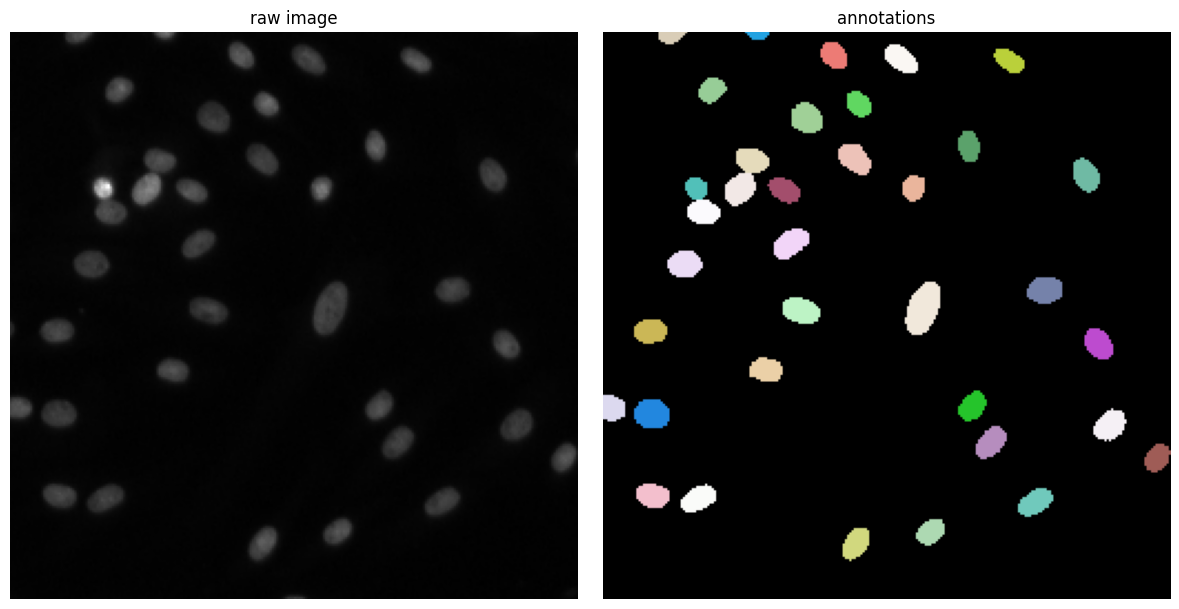

In [7]:
fig, ax = plt.subplots(1,2,figsize = (12,6))
ax[0].imshow(img, cmap = 'gray')
ax[0].axis('off')
ax[0].set_title('raw image')
ax[1].imshow(lbl, cmap = lbl_cmap)
ax[1].axis('off')
ax[1].set_title('annotations')

plt.tight_layout()
plt.show()

In [18]:
import pandas as pd

# Xuất img
pd.DataFrame(img).to_csv("img_matrix.csv", index=False)


# Xuất lbl
pd.DataFrame(lbl).to_csv("lbl_matrix.csv", index=False)

print("Đã lưu xong 2 file CSV")

Đã lưu xong 2 file CSV
